In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection
import seaborn as sns
color = sns.color_palette()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
################################ Feature Engineering ################################

In [3]:
ts = pd.read_csv('./Data/training_set_cleaned.csv')
ts['Zestimate'] = ts['logerror'].apply(lambda x: (math.exp(x)*10000))
print(ts.shape)
ts.head()

(165091, 37)


,parcelid,logerror,year_x,month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,Zestimate
0,11016594,0.0276,2016,1,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,6037.0,2.0,1.813335,347.788073,2.0,34.280990,-118.488536,7528.0,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,1.000000,1959.0,122754.0,360170.0,2015.0,237416.0,6735.880000,6.037107e+13,10279.844084
1,14366692,-0.1684,2016,1,1.0,3.5,4.0,7.0,3.5,2263.0,2263.0,6059.0,3.0,2.000000,468.000000,2.0,33.668120,-117.677556,3643.0,1,261.0,LAR1,6.059052e+07,32380.0,1286.0,27080.0,96962.0,0.0,1.110391,2014.0,346458.0,585529.0,2015.0,239071.0,10153.020000,6.049424e+13,8450.157608
2,12098116,-0.0040,2016,1,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,6037.0,3.0,1.813335,347.788073,2.0,34.136312,-118.175032,11423.0,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,1.000000,1940.0,61994.0,119906.0,2015.0,57912.0,5984.582647,6.037464e+13,9960.079893
3,12643413,0.0218,2016,1,1.0,2.0,2.0,4.0,2.0,839.0,839.0,6037.0,2.0,1.813335,347.788073,2.0,33.755800,-118.309000,70859.0,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,1.000000,1987.0,171518.0,244880.0,2015.0,73362.0,3048.740000,6.037296e+13,10220.393562
4,14432541,-0.0050,2016,1,1.0,2.5,4.0,7.0,2.5,2283.0,2283.0,6059.0,2.0,2.000000,598.000000,2.0,33.485643,-117.700234,6000.0,122,261.0,LAR1,6.059042e+07,17686.0,1286.0,27080.0,96961.0,8.0,1.110391,1981.0,169574.0,434551.0,2015.0,264977.0,5488.960000,6.059042e+13,9950.124792


In [4]:
ts['propertyzoningdesc'].value_counts()

LAR1          72309
LAR3           5169
LARS           2849
LBR1N          2637
LARD1.5        2397
LAR2           2259
SCUR2          2041
LARD2          1780
LARA           1486
LARE11         1321
LARE15         1166
TORR-LO        1148
LCR1YY         1008
SCUR3           940
LAR4            899
LARD3           788
PSR6            772
LKR1YY          760
LCA11*          614
GLR1YY          613
LCR1*           613
PDR1*           608
LCA22*          592
LAC2            547
LCA21*          516
BUR1YY          509
CARS*           498
LCA25*          480
LBR2N           480
NOR1YY          463
MNRS            460
LCA106          459
CORL*           458
WDR4*           454
LCR3*           428
PRSF*           411
SCSP            407
SMR2*           396
LAR5            390
LMR1*           380
LCR175          379
ALRPD*          368
LCR2*           365
SCUR1           363
PSR4            357
BPR1*           351
LRR7000*        344
LRA22*          336
LKR1*           336
GLR4*           333


In [5]:
# Numerical Encoding for 'propertyzoningdesc'
a = []
for i in ts['propertyzoningdesc']:
    if i == 'LAR1':
        a.append(1)
    elif i == 'LAR3':
        a.append(2)
    elif i == 'LARS':
        a.append(3)
    elif i == 'LBR1N':
        a.append(4)
    elif i == 'LARD1.5':
        a.append(5)
    elif i == 'LAR2':
        a.append(6)
    elif i == 'SCUR2':
        a.append(7)
    else:
        a.append(8)
ts['propertyzoningdesc'] = pd.Series(a)
ts.head()

,parcelid,logerror,year_x,month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,Zestimate
0,11016594,0.0276,2016,1,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,6037.0,2.0,1.813335,347.788073,2.0,34.280990,-118.488536,7528.0,0100,261.0,3,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,1.000000,1959.0,122754.0,360170.0,2015.0,237416.0,6735.880000,6.037107e+13,10279.844084
1,14366692,-0.1684,2016,1,1.0,3.5,4.0,7.0,3.5,2263.0,2263.0,6059.0,3.0,2.000000,468.000000,2.0,33.668120,-117.677556,3643.0,1,261.0,1,6.059052e+07,32380.0,1286.0,27080.0,96962.0,0.0,1.110391,2014.0,346458.0,585529.0,2015.0,239071.0,10153.020000,6.049424e+13,8450.157608
2,12098116,-0.0040,2016,1,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,6037.0,3.0,1.813335,347.788073,2.0,34.136312,-118.175032,11423.0,0100,261.0,8,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,1.000000,1940.0,61994.0,119906.0,2015.0,57912.0,5984.582647,6.037464e+13,9960.079893
3,12643413,0.0218,2016,1,1.0,2.0,2.0,4.0,2.0,839.0,839.0,6037.0,2.0,1.813335,347.788073,2.0,33.755800,-118.309000,70859.0,010C,266.0,2,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,1.000000,1987.0,171518.0,244880.0,2015.0,73362.0,3048.740000,6.037296e+13,10220.393562
4,14432541,-0.0050,2016,1,1.0,2.5,4.0,7.0,2.5,2283.0,2283.0,6059.0,2.0,2.000000,598.000000,2.0,33.485643,-117.700234,6000.0,122,261.0,1,6.059042e+07,17686.0,1286.0,27080.0,96961.0,8.0,1.110391,1981.0,169574.0,434551.0,2015.0,264977.0,5488.960000,6.059042e+13,9950.124792


In [6]:
ts['propertycountylandusecode'].value_counts()

0100    56561
122     28048
010C    18849
0101    13615
34      10706
1111     7153
1        5212
010E     4285
010D     4102
0200     3935
1129     2979
1110     2116
0400     1333
0300     1042
012C      893
0104      710
1128      680
01DC      451
01HC      284
010V      234
38        198
96        188
0103      172
010G      147
010H      135
010M      111
0700      104
1117      100
0108       94
1210       87
135        72
0201       65
010F       56
0109       45
1222       44
1014       38
1116       21
73         19
1410       18
1720       14
1112       13
012E       12
1310       12
070D       12
0110       10
1321        9
0401        8
040V        7
0113        6
020G        5
0102        5
100V        5
105         5
1421        4
1333        4
012D        4
1012        3
0111        3
0130        3
0301        3
1432        3
0105        3
030G        3
1722        3
1120        3
020M        2
0131        2
0114        2
1011        2
1420        1
0210        1
0     

In [7]:
# Numerical Encoding for 'propertycountylandusecode'
b = []
for i in ts['propertycountylandusecode']:
    if i == '0100':
        b.append(1)
    elif i == '122':
        b.append(2)
    elif i == '010C':
        b.append(3)
    elif i == '0101':
        b.append(4)
    elif i == '34':
        b.append(5)
    elif i == '1111':
        b.append(6)
    elif i == '1':
        b.append(7)
    else:
        b.append(8)
ts['propertycountylandusecode'] = pd.Series(b)
ts.head()

,parcelid,logerror,year_x,month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,Zestimate
0,11016594,0.0276,2016,1,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,6037.0,2.0,1.813335,347.788073,2.0,34.280990,-118.488536,7528.0,1,261.0,3,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,1.000000,1959.0,122754.0,360170.0,2015.0,237416.0,6735.880000,6.037107e+13,10279.844084
1,14366692,-0.1684,2016,1,1.0,3.5,4.0,7.0,3.5,2263.0,2263.0,6059.0,3.0,2.000000,468.000000,2.0,33.668120,-117.677556,3643.0,7,261.0,1,6.059052e+07,32380.0,1286.0,27080.0,96962.0,0.0,1.110391,2014.0,346458.0,585529.0,2015.0,239071.0,10153.020000,6.049424e+13,8450.157608
2,12098116,-0.0040,2016,1,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,6037.0,3.0,1.813335,347.788073,2.0,34.136312,-118.175032,11423.0,1,261.0,8,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,1.000000,1940.0,61994.0,119906.0,2015.0,57912.0,5984.582647,6.037464e+13,9960.079893
3,12643413,0.0218,2016,1,1.0,2.0,2.0,4.0,2.0,839.0,839.0,6037.0,2.0,1.813335,347.788073,2.0,33.755800,-118.309000,70859.0,3,266.0,2,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,1.000000,1987.0,171518.0,244880.0,2015.0,73362.0,3048.740000,6.037296e+13,10220.393562
4,14432541,-0.0050,2016,1,1.0,2.5,4.0,7.0,2.5,2283.0,2283.0,6059.0,2.0,2.000000,598.000000,2.0,33.485643,-117.700234,6000.0,2,261.0,1,6.059042e+07,17686.0,1286.0,27080.0,96961.0,8.0,1.110391,1981.0,169574.0,434551.0,2015.0,264977.0,5488.960000,6.059042e+13,9950.124792


In [8]:
ts['fips'].value_counts()

6037.0    107363
6059.0     44449
6111.0     13279
Name: fips, dtype: int64

In [9]:
# Numerical Encoding for 'fips'
c = []
for i in ts['fips']:
    if i == 6037:
        c.append(1)
    elif i == 6059:
        c.append(2)
    elif i == 6111:
        c.append(3)
ts['fips'] = pd.Series(c)
ts.head()

,parcelid,logerror,year_x,month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,Zestimate
0,11016594,0.0276,2016,1,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,1,2.0,1.813335,347.788073,2.0,34.280990,-118.488536,7528.0,1,261.0,3,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,1.000000,1959.0,122754.0,360170.0,2015.0,237416.0,6735.880000,6.037107e+13,10279.844084
1,14366692,-0.1684,2016,1,1.0,3.5,4.0,7.0,3.5,2263.0,2263.0,2,3.0,2.000000,468.000000,2.0,33.668120,-117.677556,3643.0,7,261.0,1,6.059052e+07,32380.0,1286.0,27080.0,96962.0,0.0,1.110391,2014.0,346458.0,585529.0,2015.0,239071.0,10153.020000,6.049424e+13,8450.157608
2,12098116,-0.0040,2016,1,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,1,3.0,1.813335,347.788073,2.0,34.136312,-118.175032,11423.0,1,261.0,8,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,1.000000,1940.0,61994.0,119906.0,2015.0,57912.0,5984.582647,6.037464e+13,9960.079893
3,12643413,0.0218,2016,1,1.0,2.0,2.0,4.0,2.0,839.0,839.0,1,2.0,1.813335,347.788073,2.0,33.755800,-118.309000,70859.0,3,266.0,2,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,1.000000,1987.0,171518.0,244880.0,2015.0,73362.0,3048.740000,6.037296e+13,10220.393562
4,14432541,-0.0050,2016,1,1.0,2.5,4.0,7.0,2.5,2283.0,2283.0,2,2.0,2.000000,598.000000,2.0,33.485643,-117.700234,6000.0,2,261.0,1,6.059042e+07,17686.0,1286.0,27080.0,96961.0,8.0,1.110391,1981.0,169574.0,434551.0,2015.0,264977.0,5488.960000,6.059042e+13,9950.124792


In [10]:
ts['regionidcounty'].value_counts()

3101.0    107363
1286.0     44449
2061.0     13279
Name: regionidcounty, dtype: int64

In [11]:
# Numerical Encoding for 'fips'
d = []
for i in ts['regionidcounty']:
    if i == 3101:
        d.append(1)
    elif i == 1286:
        d.append(2)
    elif i == 2061:
        d.append(3)
ts['regionidcounty'] = pd.Series(d)
ts.head()

,parcelid,logerror,year_x,month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,Zestimate
0,11016594,0.0276,2016,1,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,1,2.0,1.813335,347.788073,2.0,34.280990,-118.488536,7528.0,1,261.0,3,6.037107e+07,12447.0,1,31817.0,96370.0,0.0,1.000000,1959.0,122754.0,360170.0,2015.0,237416.0,6735.880000,6.037107e+13,10279.844084
1,14366692,-0.1684,2016,1,1.0,3.5,4.0,7.0,3.5,2263.0,2263.0,2,3.0,2.000000,468.000000,2.0,33.668120,-117.677556,3643.0,7,261.0,1,6.059052e+07,32380.0,2,27080.0,96962.0,0.0,1.110391,2014.0,346458.0,585529.0,2015.0,239071.0,10153.020000,6.049424e+13,8450.157608
2,12098116,-0.0040,2016,1,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,1,3.0,1.813335,347.788073,2.0,34.136312,-118.175032,11423.0,1,261.0,8,6.037464e+07,47019.0,1,275411.0,96293.0,0.0,1.000000,1940.0,61994.0,119906.0,2015.0,57912.0,5984.582647,6.037464e+13,9960.079893
3,12643413,0.0218,2016,1,1.0,2.0,2.0,4.0,2.0,839.0,839.0,1,2.0,1.813335,347.788073,2.0,33.755800,-118.309000,70859.0,3,266.0,2,6.037296e+07,12447.0,1,54300.0,96222.0,0.0,1.000000,1987.0,171518.0,244880.0,2015.0,73362.0,3048.740000,6.037296e+13,10220.393562
4,14432541,-0.0050,2016,1,1.0,2.5,4.0,7.0,2.5,2283.0,2283.0,2,2.0,2.000000,598.000000,2.0,33.485643,-117.700234,6000.0,2,261.0,1,6.059042e+07,17686.0,2,27080.0,96961.0,8.0,1.110391,1981.0,169574.0,434551.0,2015.0,264977.0,5488.960000,6.059042e+13,9950.124792


In [12]:
######## Filter Feature Selection Method ########
# 1. Individual criteria
# Drop feature whose variance is below 0.2
vt = feature_selection.VarianceThreshold(threshold=0.5)
d = vt.fit_transform(ts)
i = 0
j = 0
for loop in range(d.shape[1]):
    if ts.loc[0][i] == d[0][j]:
        i+=1
        j+=1
    else: 
        print(ts.columns[i])
        i+=1

logerror
year_x
fips
garagecarcnt
latitude
longitude
regionidcounty


In [13]:
ts1 = ts.drop(['garagecarcnt','year_x','fips','regionidcounty','logerror'], axis=1)
print(ts1.shape)
ts1.head()

(165091, 32)


,parcelid,month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,Zestimate
0,11016594,1,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,2.0,347.788073,2.0,34.280990,-118.488536,7528.0,1,261.0,3,6.037107e+07,12447.0,31817.0,96370.0,0.0,1.000000,1959.0,122754.0,360170.0,2015.0,237416.0,6735.880000,6.037107e+13,10279.844084
1,14366692,1,1.0,3.5,4.0,7.0,3.5,2263.0,2263.0,3.0,468.000000,2.0,33.668120,-117.677556,3643.0,7,261.0,1,6.059052e+07,32380.0,27080.0,96962.0,0.0,1.110391,2014.0,346458.0,585529.0,2015.0,239071.0,10153.020000,6.049424e+13,8450.157608
2,12098116,1,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,3.0,347.788073,2.0,34.136312,-118.175032,11423.0,1,261.0,8,6.037464e+07,47019.0,275411.0,96293.0,0.0,1.000000,1940.0,61994.0,119906.0,2015.0,57912.0,5984.582647,6.037464e+13,9960.079893
3,12643413,1,1.0,2.0,2.0,4.0,2.0,839.0,839.0,2.0,347.788073,2.0,33.755800,-118.309000,70859.0,3,266.0,2,6.037296e+07,12447.0,54300.0,96222.0,0.0,1.000000,1987.0,171518.0,244880.0,2015.0,73362.0,3048.740000,6.037296e+13,10220.393562
4,14432541,1,1.0,2.5,4.0,7.0,2.5,2283.0,2283.0,2.0,598.000000,2.0,33.485643,-117.700234,6000.0,2,261.0,1,6.059042e+07,17686.0,27080.0,96961.0,8.0,1.110391,1981.0,169574.0,434551.0,2015.0,264977.0,5488.960000,6.059042e+13,9950.124792


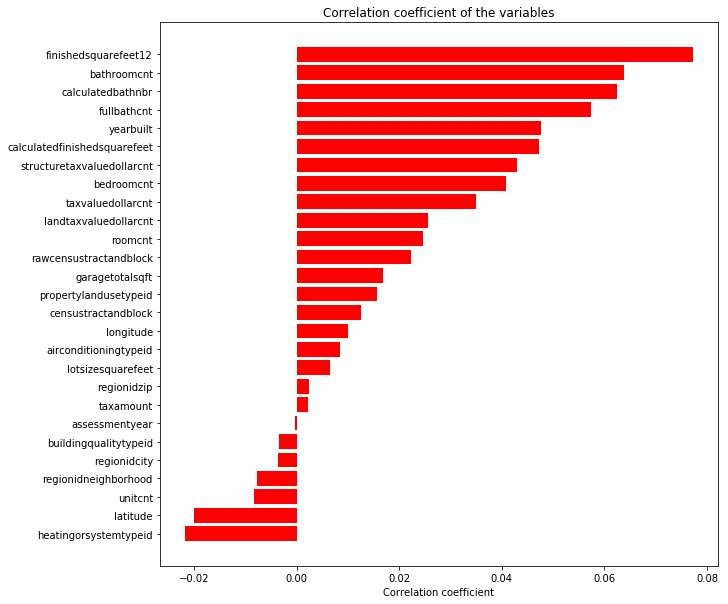

In [14]:
# For each feature i, compute some measure of how imformative xi is about y
# 2. Importance and Correlation
# Using np.corrcoef, which is totally mathametical
x_cols = [col for col in ts1.columns if col not in ['Zestimate'] if ts[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(ts1[col].values, ts1.Zestimate.values)[0,1])
corr_df = pd.DataFrame({'feature':labels, 'correalation':values})
corr_df = corr_df.sort_values(by='correalation')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(10,10))
rects = ax.barh(ind, np.array(corr_df.correalation.values), color='r')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.feature.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [15]:
corr_df_sel = corr_df.loc[(corr_df['correalation']>0.02) | (corr_df['correalation'] < -0.005)]
corr_df_sel.T

,9,10,19,16,14,18,24,22,2,21,5,20,7,4,1,6
correalation,-0.0216901,-0.019974,-0.00822173,-0.00767566,0.0223147,0.0246104,0.0256633,0.0349704,0.0408256,0.042965,0.0471786,0.047684,0.0574239,0.0625266,0.0638809,0.0771954
feature,heatingorsystemtypeid,latitude,unitcnt,regionidneighborhood,rawcensustractandblock,roomcnt,landtaxvaluedollarcnt,taxvaluedollarcnt,bedroomcnt,structuretaxvaluedollarcnt,calculatedfinishedsquarefeet,yearbuilt,fullbathcnt,calculatedbathnbr,bathroomcnt,finishedsquarefeet12


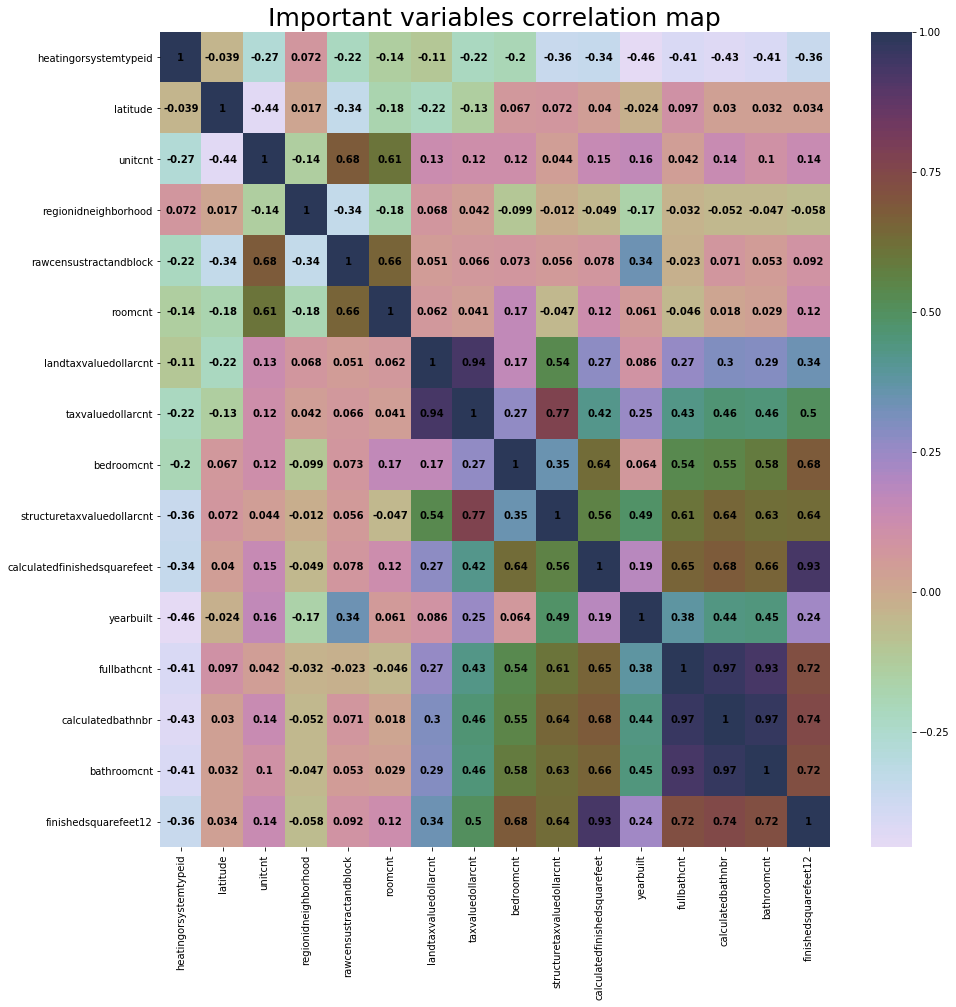

In [16]:
# Between the features
import seaborn as sns
cols_to_use = corr_df_sel.feature.tolist()

temp_df = ts1[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(15,15))
cmap = sns.cubehelix_palette(start = 1.5, rot = 3., gamma=0.8, as_cmap = True)
sns.heatmap(corrmat, annot=True, annot_kws={'size':10,'weight':'bold', 'color':'black'}, cmap=cmap)
plt.title("Important variables correlation map", fontsize=25)
plt.show()

[ 0.05829597  0.05979073  0.          0.01046338  0.01195815  0.00747384
  0.00747384  0.04334828  0.10014948  0.          0.02541106  0.
  0.06726457  0.05530643  0.0612855   0.04484305  0.03437967  0.00597907
  0.03139013  0.02092676  0.01345291  0.03437967  0.00448431  0.01943199
  0.04633782  0.04932735  0.0612855   0.          0.04035874  0.06278027
  0.02242152]


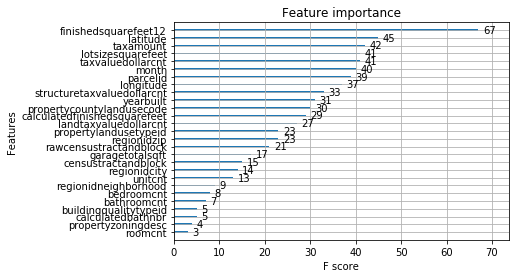

,8,12,29,26,14,1,0,13,25,24,15,7,28,21,16,18,10,30,19,23,20,4,3,6,5,17,22,27,9,2,11
feature,finishedsquarefeet12,latitude,taxamount,taxvaluedollarcnt,lotsizesquarefeet,month,parcelid,longitude,structuretaxvaluedollarcnt,yearbuilt,propertycountylandusecode,calculatedfinishedsquarefeet,landtaxvaluedollarcnt,regionidzip,propertylandusetypeid,rawcensustractandblock,garagetotalsqft,censustractandblock,regionidcity,unitcnt,regionidneighborhood,bedroomcnt,bathroomcnt,calculatedbathnbr,buildingqualitytypeid,propertyzoningdesc,roomcnt,assessmentyear,fullbathcnt,airconditioningtypeid,heatingorsystemtypeid
importance,0.100149,0.0672646,0.0627803,0.0612855,0.0612855,0.0597907,0.058296,0.0553064,0.0493274,0.0463378,0.044843,0.0433483,0.0403587,0.0343797,0.0343797,0.0313901,0.0254111,0.0224215,0.0209268,0.019432,0.0134529,0.0119581,0.0104634,0.00747384,0.00747384,0.00597907,0.00448431,0,0,0,0


In [17]:
# Another way using xgboost.XGBRegressor()
import xgboost as xgb
from xgboost import plot_importance
f_label = ts1['Zestimate']
f_train = ts1.drop('Zestimate', axis=1)
model = xgb.XGBRegressor()
model.fit(f_train, f_label)
plot_importance(model, max_num_features=ts.shape[1])
print(model.feature_importances_)
plt.show()
d = {'feature': f_train.columns,'importance': model.feature_importances_}
fi_xgb = pd.DataFrame(d)
fi_xgb.sort_values(by='importance', ascending=False).T

In [18]:
co_xgb = fi_xgb.loc[(fi_xgb['importance']>0.03)]
print(co_xgb.shape)
co_xgb.sort_values(by='importance', ascending=False)

(16, 2)


,feature,importance
8,finishedsquarefeet12,0.100149
12,latitude,0.067265
29,taxamount,0.062780
14,lotsizesquarefeet,0.061285
26,taxvaluedollarcnt,0.061285
1,month,0.059791
0,parcelid,0.058296
13,longitude,0.055306
25,structuretaxvaluedollarcnt,0.049327
24,yearbuilt,0.046338


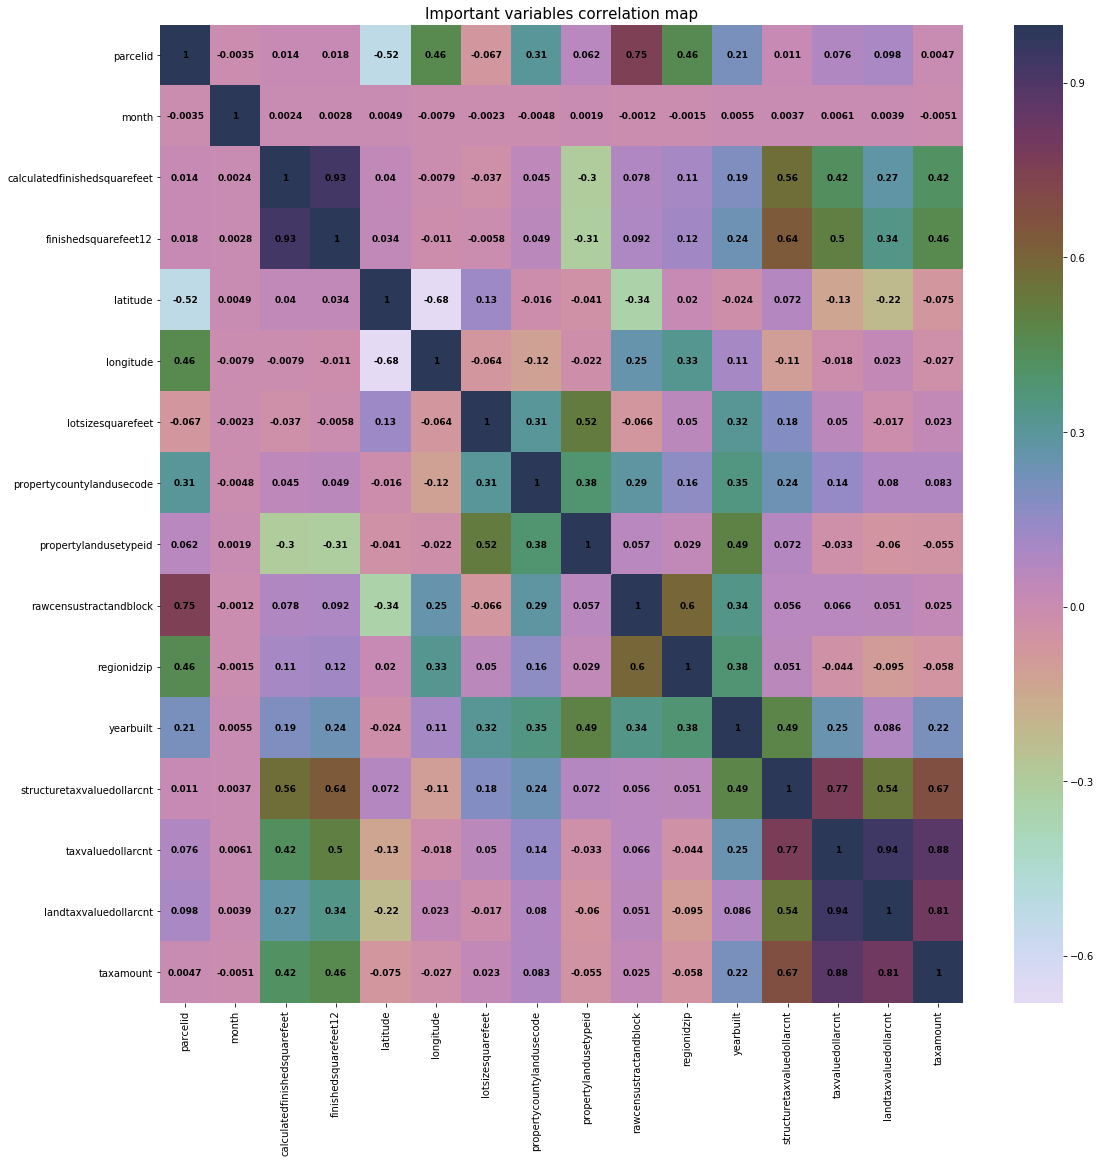

In [19]:
temp_df = ts1[co_xgb.feature.tolist()]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(18,18))
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(corrmat, annot=True, annot_kws={'size':9,'weight':'bold', 'color':'black'}, cmap=cmap)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [20]:
# Another way using RandomForestRegressor()
from sklearn.model_selection import train_test_split
y=ts1['Zestimate'].values.astype(np.float32)
#rf = RandomForestRegressor(max_depth=150,random_state=42) score=0.08, n_estimators=30 s=0.076
rf = RandomForestRegressor(n_estimators=30,max_depth=10,random_state=42,max_features=10)#,criterion='mae')
rf.fit(f_train, f_label)
d = {'feature': f_train.columns,'importance': rf.feature_importances_}
fi_rf = pd.DataFrame(d)
fi_rf.sort_values(by='importance', ascending=False)

,feature,importance
8,finishedsquarefeet12,0.085259
29,taxamount,0.069739
13,longitude,0.063243
28,landtaxvaluedollarcnt,0.063142
26,taxvaluedollarcnt,0.061485
0,parcelid,0.061476
14,lotsizesquarefeet,0.059202
12,latitude,0.059138
24,yearbuilt,0.058003
25,structuretaxvaluedollarcnt,0.053911


In [21]:
co_rf = fi_rf.loc[(fi_rf['importance']>0.025)]
print(co_rf.shape)
co_rf.sort_values(by='importance', ascending=False)

(15, 2)


,feature,importance
8,finishedsquarefeet12,0.085259
29,taxamount,0.069739
13,longitude,0.063243
28,landtaxvaluedollarcnt,0.063142
26,taxvaluedollarcnt,0.061485
0,parcelid,0.061476
14,lotsizesquarefeet,0.059202
12,latitude,0.059138
24,yearbuilt,0.058003
25,structuretaxvaluedollarcnt,0.053911


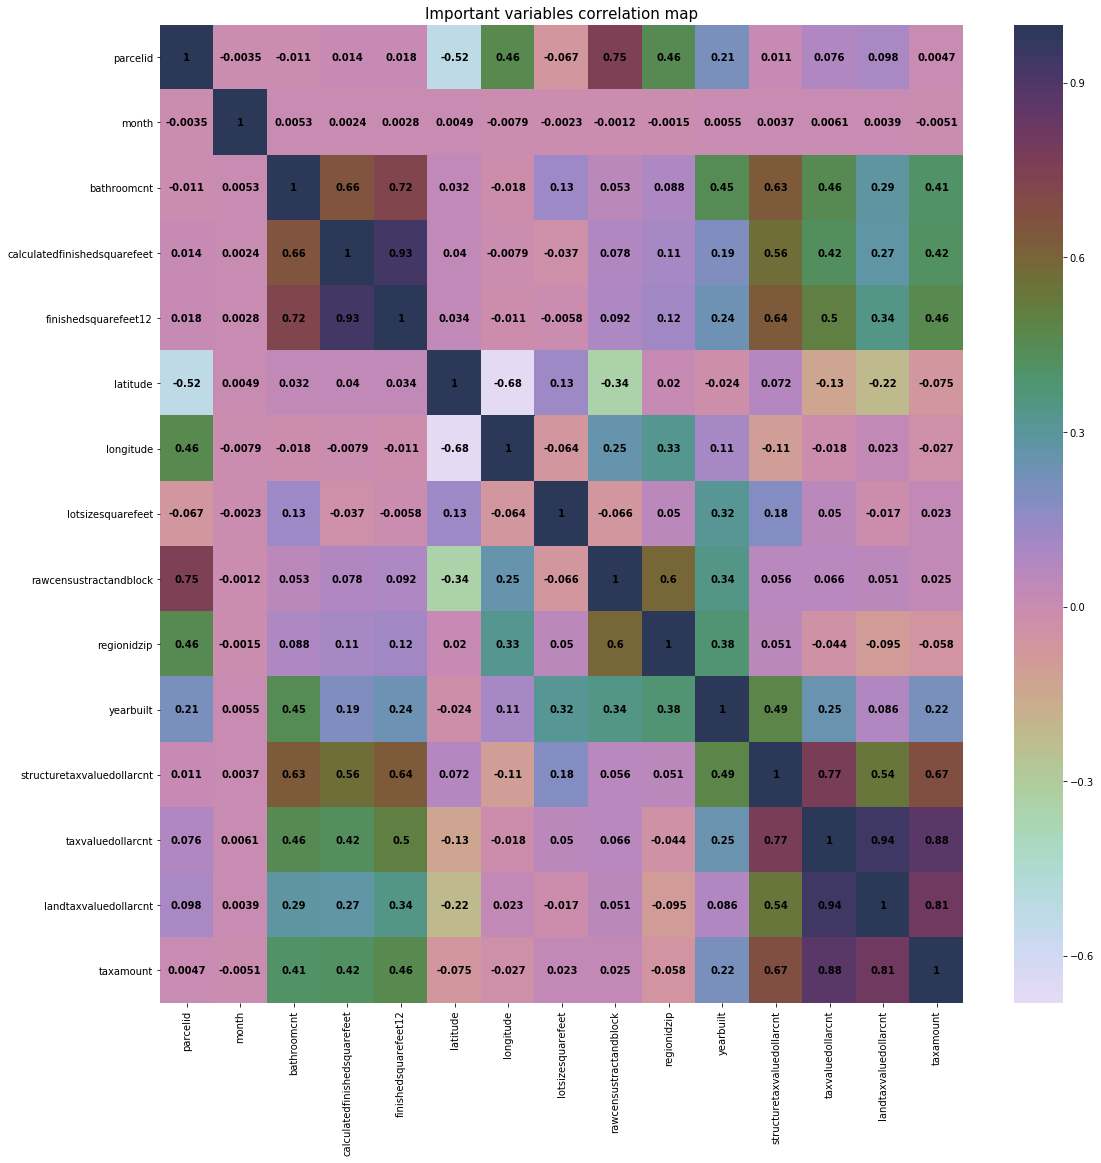

In [22]:
temp_df = ts[co_rf.feature.tolist()]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(18,18))
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(corrmat, annot=True, annot_kws={'size':10,'weight':'bold', 'color':'black'}, cmap=cmap)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [23]:
################### Selecting the n best features and the target ###################
# Features that fall into both criteria
inter = pd.merge(co_xgb, co_rf, on='feature', how='inner')
inter

,feature,importance_x,importance_y
0,parcelid,0.058296,0.061476
1,month,0.059791,0.036299
2,calculatedfinishedsquarefeet,0.043348,0.042667
3,finishedsquarefeet12,0.100149,0.085259
4,latitude,0.067265,0.059138
5,longitude,0.055306,0.063243
6,lotsizesquarefeet,0.061285,0.059202
7,rawcensustractandblock,0.031390,0.025862
8,regionidzip,0.034380,0.042932
9,yearbuilt,0.046338,0.058003


In [24]:
features = ['parcelid','Zestimate','logerror',\
            'finishedsquarefeet12','lotsizesquarefeet','taxamount',\
            'longitude','latitude','regionidzip','yearbuilt','month']
fs_inter = ts[features]
fs_inter.head()

,parcelid,Zestimate,logerror,finishedsquarefeet12,lotsizesquarefeet,taxamount,longitude,latitude,regionidzip,yearbuilt,month
0,11016594,10279.844084,0.0276,1684.0,7528.0,6735.880000,-118.488536,34.280990,96370.0,1959.0,1
1,14366692,8450.157608,-0.1684,2263.0,3643.0,10153.020000,-117.677556,33.668120,96962.0,2014.0,1
2,12098116,9960.079893,-0.0040,2217.0,11423.0,5984.582647,-118.175032,34.136312,96293.0,1940.0,1
3,12643413,10220.393562,0.0218,839.0,70859.0,3048.740000,-118.309000,33.755800,96222.0,1987.0,1
4,14432541,9950.124792,-0.0050,2283.0,6000.0,5488.960000,-117.700234,33.485643,96961.0,1981.0,1


In [25]:
fs_inter.to_csv("./Data/features_inter.csv",index=None)

In [26]:
# Features that fall either criteria
union = pd.merge(co_xgb, co_rf, on='feature', how='outer')
union

,feature,importance_x,importance_y
0,parcelid,0.058296,0.061476
1,month,0.059791,0.036299
2,calculatedfinishedsquarefeet,0.043348,0.042667
3,finishedsquarefeet12,0.100149,0.085259
4,latitude,0.067265,0.059138
5,longitude,0.055306,0.063243
6,lotsizesquarefeet,0.061285,0.059202
7,propertycountylandusecode,0.044843,NaN
8,propertylandusetypeid,0.034380,NaN
9,rawcensustractandblock,0.031390,0.025862


In [27]:
features_union = ['parcelid','Zestimate','logerror',\
                  'finishedsquarefeet12','lotsizesquarefeet','taxamount',\
                  'longitude','latitude','regionidzip','yearbuilt','month',\
                  'bathroomcnt','censustractandblock','propertycountylandusecode']
fs_union = ts[features_union]
fs_union.head()

,parcelid,Zestimate,logerror,finishedsquarefeet12,lotsizesquarefeet,taxamount,longitude,latitude,regionidzip,yearbuilt,month,bathroomcnt,censustractandblock,propertycountylandusecode
0,11016594,10279.844084,0.0276,1684.0,7528.0,6735.880000,-118.488536,34.280990,96370.0,1959.0,1,2.0,6.037107e+13,1
1,14366692,8450.157608,-0.1684,2263.0,3643.0,10153.020000,-117.677556,33.668120,96962.0,2014.0,1,3.5,6.049424e+13,7
2,12098116,9960.079893,-0.0040,2217.0,11423.0,5984.582647,-118.175032,34.136312,96293.0,1940.0,1,3.0,6.037464e+13,1
3,12643413,10220.393562,0.0218,839.0,70859.0,3048.740000,-118.309000,33.755800,96222.0,1987.0,1,2.0,6.037296e+13,3
4,14432541,9950.124792,-0.0050,2283.0,6000.0,5488.960000,-117.700234,33.485643,96961.0,1981.0,1,2.5,6.059042e+13,2


In [28]:
fs_union.to_csv("./Data/features_union.csv",index=None)

In [29]:
import gc
gc.collect()

63376

In [ ]:
################################ End of Feature Engineering ################################